In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

## 1. 샘플 소개

In [2]:
# pip install mglearn
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


Text(0, 0.5, '두 번째 특성')

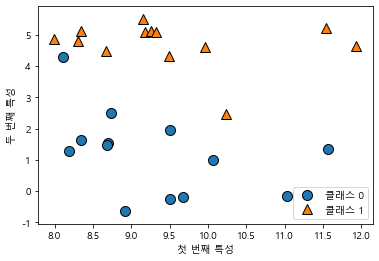

In [8]:
##### 이진 분류용 데이터셋

X, y = mglearn.datasets.make_forge()
print(X)
print(y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]] [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

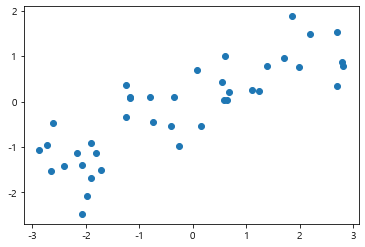

In [11]:
##### 선형 회귀용 샘플

X, y = mglearn.datasets.make_wave(n_samples=40)
print(X, y)

plt.plot(X, y, "o")
plt.xlabel("특성")
plt.ylabel("타겟")

In [22]:
cancer = load_breast_cancer()
# print(cancer)
# print(cancer.keys())
# print(cancer.data)
# print(cancer.target)
# print(cancer.DESCR)
print(type(cancer))
print(cancer.data.shape)

<class 'sklearn.utils.Bunch'>
(569, 30)


In [24]:
boston = load_boston()
boston.data.shape
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

---
## 2. 용어 정리


### (1) 과대적합

+ 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만드는 것


### (2) 과소적합

+ 너무 간단한 모델이 선택되는 것


### (3) 일반화

+ 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것


### (4) 거리 측정 : L1 norm, L2 norm

+ L1 norm
    - 단순한 절대값의 거리 합
    - 맨하탄 거리
    
    
+ L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스 정리, 유클리드 거리

---

## 3. KNN(K - Nearest Neighbors)

### (1) 특징

+ 이해하기 쉽고 직관적인 모델
+ 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
+ 훈련셋이 너무 많으면 예측이 느려진다.

### (2) 하이퍼 파라미터

+ 이웃의 갯수(k)
+ 데이터 사이의 거리를 측정 : L2 norm

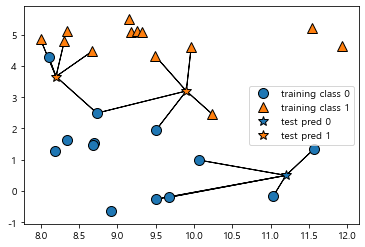

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

### (2) L1 norm, L2 norm

In [15]:
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3, 2)))
df.columns = ["x", "y"]
df

,x,y
0,8,5
1,6,7
2,1,9


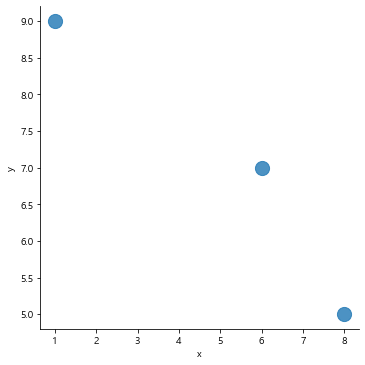

In [16]:
sns.lmplot("x", "y", data=df, fit_reg=False, scatter_kws={"s":200})

In [18]:
##### (0, 0) 으로부터 어디가 제일 가까울까?
# 데이터의 최단 거리를 구하는 것이기 때문에 L2 norm 을 사용한다.

from numpy import linalg

val = df.values
val

linalg.norm(val, ord=2, axis=1)

array([9.43398113, 9.21954446, 9.05538514])

In [19]:
##### 3명이 주사위를 3번을 던진 후 걸음 수 측정

df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3, 3)))
df.columns = ["move1", "move2", "move3"]
df

,move1,move2,move3
0,0,-1,0
1,-2,1,-2
2,-1,0,0


In [20]:
##### 누가 가장 많이 걸었을까?
# 데이터의 거리 합을 구하는 것이기 때문에 L1 norm을 사용

linalg.norm(df.values, ord=1, axis=1)

array([1., 5., 1.])

### (3) KNN 구현

In [24]:
X, y = mglearn.datasets.make_forge()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 2)
(19, 2) (7, 2) (19,) (7,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [44]:
print(y_test)

[1 0 1 0 1 1 0]


In [45]:
clf.score(X_test, y_test)

0.8571428571428571

### (4) KNN 분석

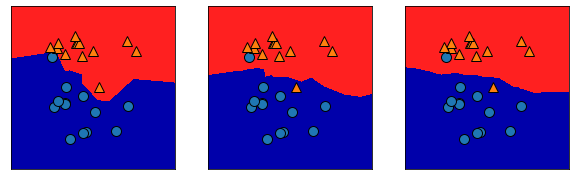

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
# mglearn.plots.plot_2d_separator(clf, X, ax=axes[0], fill=True)

# clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])
# mglearn.plots.plot_2d_separator(clf, X, ax=axes[1], fill=True)

# clf = KNeighborsClassifier(n_neighbors=9).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[2])
# mglearn.plots.plot_2d_separator(clf, X, ax=axes[2], fill=True)

for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, fill=True)

#### 1) 유방암 데이터셋으로 확인

In [53]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [58]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [59]:
clf.score(X_train, y_train)

0.9389671361502347

In [60]:
clf.score(X_test, y_test)

0.9370629370629371

#### 2) 가장 적절한 하이퍼 파라미터 선정

In [61]:
train_acc = []
test_acc = []

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

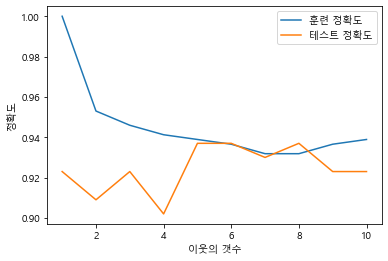

In [67]:
plt.plot(range(1, 11), train_acc, label="훈련 정확도")
plt.plot(range(1, 11), test_acc, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 갯수")
plt.legend()

### (5) 회귀분석을 위한 KNN

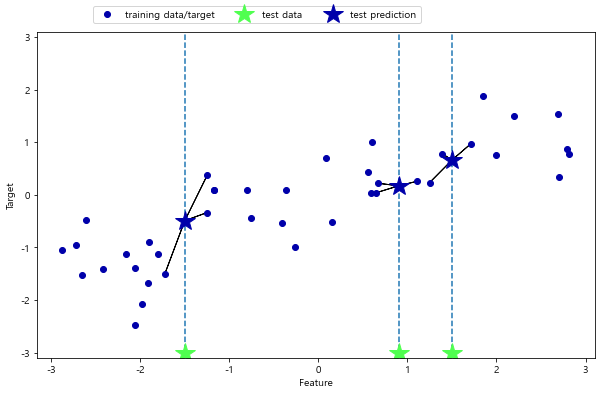

In [68]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [69]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30, 1) (10, 1) (30,) (10,)


In [70]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [72]:
print("설명 계수(R^2) : ", reg.score(X_train, y_train))

설명 계수(R^2) :  0.8194343929538755


In [73]:
print("설명 계수(R^2) : ", reg.score(X_test, y_test))

설명 계수(R^2) :  0.8344172446249605


In [74]:
X_test, y_test

(array([[-1.24713211],
        [ 0.67111737],
        [ 1.71105577],
        [-2.06388816],
        [-2.87649303],
        [-1.89957294],
        [ 0.55448741],
        [ 2.81945911],
        [-0.40832989],
        [-2.72129752]]),
 array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
        -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133]))

In [77]:
reg.predict([[1.71105577]])

array([1.13671923])

In [78]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [79]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

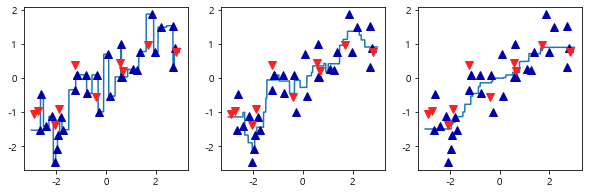

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)

---

### (6) 응용 예제1 : 붓꽃 데이터

In [86]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
